# LeNet Training for MNIST Dataset
* Author: Ziad Tamim
* Description: Training LeNet with MNIST Dataset. Loading data, building the Lenet achetiture using tensorflow, training the model, and evaluating its performance.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


2024-04-30 09:43:52.454617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 09:43:52.454755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 09:43:52.618409: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading Training and testing data (MNIST)
* Loading the data using pandas read_csv function
* Normalising pixle values

In [4]:
# Load the training and test data from CSV files
train_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

# Assuming the first column is 'label' and the rest are pixel values
y_train = train_df['label'].values
x_train = train_df.drop(['label'], axis=1).values.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values
y_test = test_df['label'].values
x_test = test_df.drop(['label'], axis=1).values.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values


## Building the LeNet architechture using tensorflow

In [5]:
def build_lenet(input_shape=(28, 28, 1)):
    model = models.Sequential([
        # 1st Convolutional Layer
        layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        
        # 2nd Convolutional Layer
        layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        
        # Flattening the data for upcoming dense layers
        layers.Flatten(),
        
        # 1st Dense Layer
        layers.Dense(units=120, activation='tanh'),
        
        # 2nd Dense Layer
        layers.Dense(units=84, activation='tanh'),
        
        # Output Layer
        layers.Dense(units=10, activation='softmax')  # 10 classes for the digits 0-9
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the LeNet model
model = build_lenet()
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model
* 15 epochs
* 64 batch size

In [6]:
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_test, y_test))


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8482 - loss: 0.5011 - val_accuracy: 0.9610 - val_loss: 0.1304
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9658 - loss: 0.1122 - val_accuracy: 0.9763 - val_loss: 0.0748
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9796 - loss: 0.0675 - val_accuracy: 0.9805 - val_loss: 0.0617
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9841 - loss: 0.0497 - val_accuracy: 0.9814 - val_loss: 0.0580
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9876 - loss: 0.0407 - val_accuracy: 0.9820 - val_loss: 0.0587
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9904 - loss: 0.0316 - val_accuracy: 0.9834 - val_loss: 0.0501
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9917 - loss: 0.0270 - val_accuracy: 0.9832 - val_loss: 0.0561
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9925 - loss: 0.0239 - 

# Visualising Training Accuracy and Loss

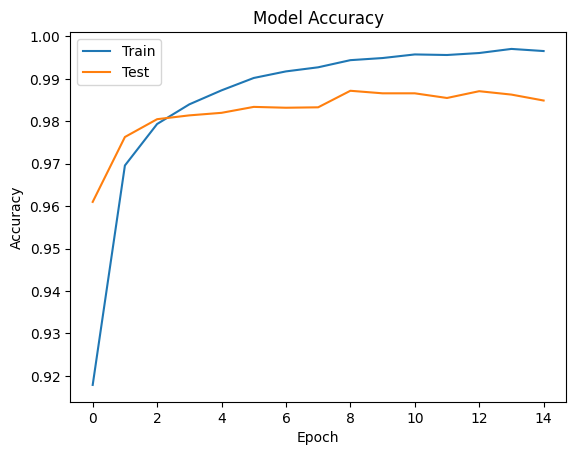

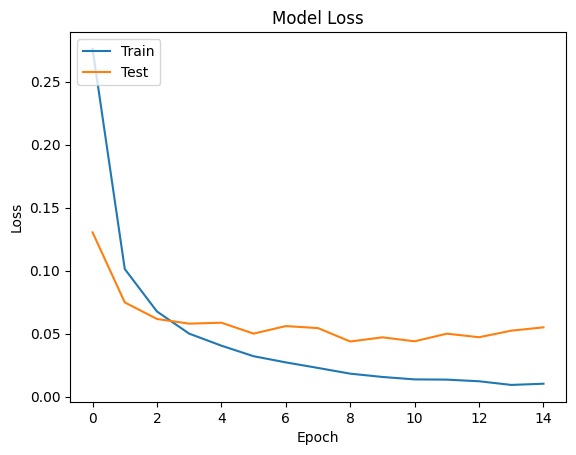

In [7]:
import matplotlib.pyplot as plt

# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Evaluaing the model using confusion matrix and classification report

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


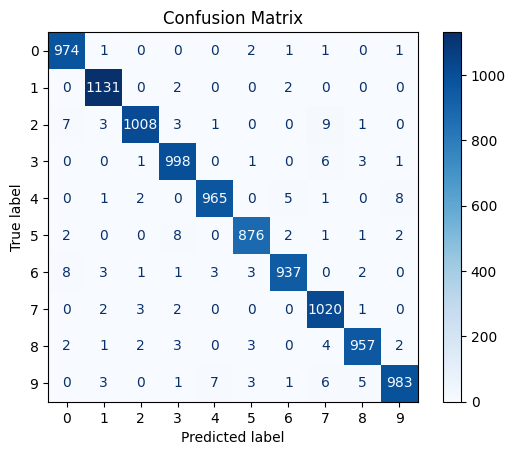

Classification Report:
               precision    recall  f1-score   support

           0     0.9809    0.9939    0.9873       980
           1     0.9878    0.9965    0.9921      1135
           2     0.9912    0.9767    0.9839      1032
           3     0.9804    0.9881    0.9842      1010
           4     0.9887    0.9827    0.9857       982
           5     0.9865    0.9821    0.9843       892
           6     0.9884    0.9781    0.9832       958
           7     0.9733    0.9922    0.9827      1028
           8     0.9866    0.9825    0.9846       974
           9     0.9860    0.9742    0.9801      1009

    accuracy                         0.9849     10000
   macro avg     0.9850    0.9847    0.9848     10000
weighted avg     0.9849    0.9849    0.9849     10000



In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Predictions for the test set
prediction_scores = model.predict(x_test)
predicted_labels = np.argmax(prediction_scores, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, predicted_labels, digits=4)
print('Classification Report:\n', report)


# Predicting an image lable from the test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


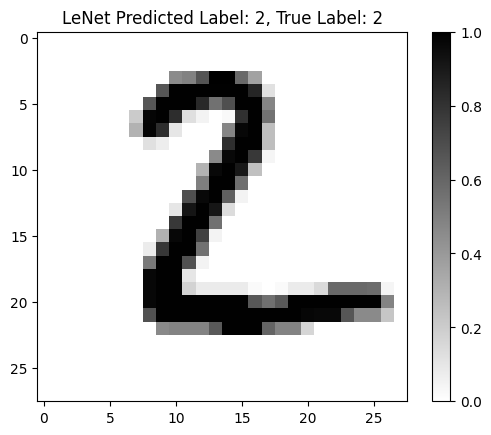

In [9]:
# Inference on a single image
img_index = 1
selected_image = x_test[img_index]
selected_label = y_test[img_index]
image_for_inference = np.expand_dims(selected_image, 0)
predictions = model.predict(image_for_inference)
predicted_label = np.argmax(predictions)

# Display the image
plt.figure()
plt.imshow(selected_image[:, :, 0], cmap=plt.cm.binary)
plt.title(f'LeNet Predicted Label: {predicted_label}, True Label: {selected_label}')
plt.colorbar()
plt.grid(False)
plt.show()